In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv("SampleData.csv", encoding='latin1')
df

/tmp/ipykernel_428/236136277.py:1: DtypeWarning: Columns (5,44,53,77,97) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("SampleData.csv", encoding='latin1')


,Prospect ID,Lead Number,Company,Lead Origin,Mobile Number,Website,Time Zone,Job Title,Lead Source,Source Medium,...,Stage Rotting Flag Level,Mailing Preferences,Twitter Id,Facebook Id,LinkedIn Id,Skype Id,Gtalk Id,Google Plus Id,Quality Score 01,Groups
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,NaN,API,NaN,NaN,NaN,NaN,Olark Chat,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,NaN,API,NaN,NaN,NaN,NaN,Organic Search,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,NaN,Landing Page Submission,NaN,NaN,NaN,NaN,Direct Traffic,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,NaN,Landing Page Submission,NaN,NaN,NaN,NaN,Direct Traffic,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3256f628-e534-4826-9d63-4a8b88782852,660681,NaN,Landing Page Submission,NaN,NaN,NaN,NaN,Google,CPC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,19d6451e-fcd6-407c-b83b-48e1af805ea9,579564,NaN,Landing Page Submission,NaN,NaN,NaN,NaN,Direct Traffic,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9236,82a7005b-7196-4d56-95ce-a79f937a158d,579546,NaN,Landing Page Submission,NaN,NaN,NaN,NaN,Direct Traffic,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9237,aac550fe-a586-452d-8d3c-f1b62c94e02c,579545,NaN,Landing Page Submission,NaN,NaN,NaN,NaN,Direct Traffic,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9238,5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9,579538,NaN,Landing Page Submission,NaN,NaN,NaN,NaN,Google,CPC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Drop features with constant values
df = df.drop(columns=["Job Title", "Next Follow Up", "Magazine", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on PGDMHBSCM", "Profile Score", "I agree to pay the amount through cheque", "What attracted you to consider SomeSchool ", "you to consider SomeSchool ", "Asymmetrique Scoring Model"])

# Drop features which are almost always NaN
df = df.dropna(axis=1, thresh=int(0.8 * len(df)))

# Drop features with high cardinality
df = df.drop(columns=["Prospect ID", "Lead Number", "Last Activity Date", "Created On", "Modified On", "Last Notable Activity Date", "Last Visit Date"])

df = df.drop_duplicates()

# Impute remaining NaNs
numeric_columns = df.select_dtypes(include=["number"]).columns
categorical_columns = df.select_dtypes(exclude=["number"]).columns

df[numeric_columns] = df[numeric_columns].fillna(0)

df[categorical_columns] = df[categorical_columns].fillna("Other")


df

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Lead Stage,Lead Score,Engagement Score,TotalVisits,Page Views Per Visit,Average Time Per Visit,...,Specialization,Search,Newspaper Article,Welearn Forums,Newspaper,Digital Advertisement,Through Recommendations,City New,a free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,Not Interested,105,0,0.0,0.00,0.00,...,Select Specialization,No,No,No,No,No,No,Select,No,Modified
1,API,Organic Search,No,No,Unreachable,120,0,5.0,2.50,83.75,...,Select Specialization,No,No,No,No,No,No,Select,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,Qualified,150,80,2.0,2.00,4.00,...,Business Administration,No,No,No,No,No,No,Mumbai,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,Unreachable,60,0,1.0,1.00,0.00,...,Media and Advertising,No,No,No,No,No,No,Mumbai,No,Modified
4,Landing Page Submission,Google,No,No,Qualified,80,10,2.0,1.00,0.00,...,Select Specialization,No,No,No,No,No,No,Mumbai,No,Modified
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,Yes,No,Qualified,190,0,8.0,2.67,67.83,...,IT Projects Management,No,No,No,No,No,No,Mumbai,No,Email Marked Spam
9236,Landing Page Submission,Direct Traffic,No,No,Unreachable,70,0,2.0,2.00,5.00,...,Media and Advertising,No,No,No,No,No,No,Mumbai,Yes,SMS Sent
9237,Landing Page Submission,Direct Traffic,Yes,No,Unreachable,60,0,2.0,2.00,2.00,...,Business Administration,No,No,No,No,No,No,Mumbai,Yes,SMS Sent
9238,Landing Page Submission,Google,No,No,Qualified,70,0,3.0,3.00,42.00,...,Human Resource Management,No,No,No,No,No,No,Other Metro Cities,No,SMS Sent


In [4]:
#from pandas_profiling import ProfileReport

#profile = ProfileReport(df, title="Pandas Profiling Report")
#profile.to_widgets()

In [5]:
df.dtypes

Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Do Not Call                                object
Lead Stage                                 object
Lead Score                                  int64
Engagement Score                            int64
TotalVisits                               float64
Page Views Per Visit                      float64
Average Time Per Visit                    float64
Last Activity                              object
Specialization                             object
Search                                     object
Newspaper Article                          object
Welearn Forums                             object
Newspaper                                  object
Digital Advertisement                      object
Through Recommendations                    object
City New                                   object
a free copy of Mastering The Interview     object


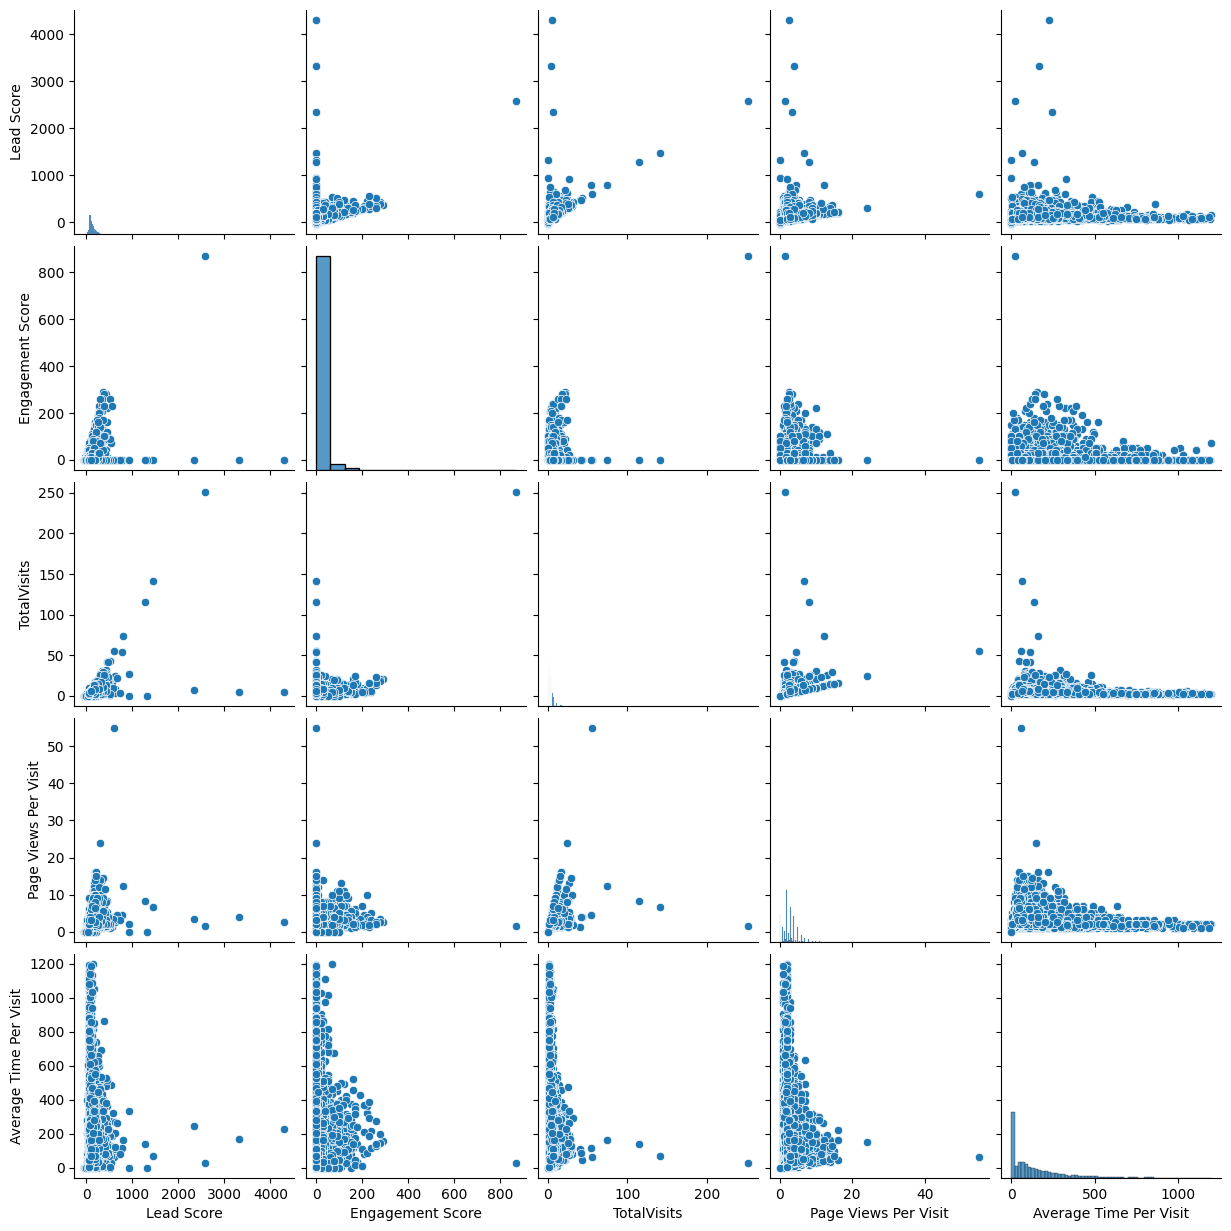

In [6]:
sns.pairplot(df)

In [7]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=0, stratify=df["Lead Stage"])

y_train = df_train.pop("Lead Stage")
y_test = df_test.pop("Lead Stage")

df_train_dict = df_train.to_dict(orient="records")
df_test_dict = df_test.to_dict(orient="records")

In [8]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)


X_train = v.fit_transform(df_train_dict)
X_test = v.transform(df_test_dict)



In [9]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0, class_weight="balanced").fit(X_train, y_train)



/home/paul/Development/leads/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
y_pred = clf.predict(X_test)

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


                precision    recall  f1-score   support

        Closed       0.26      0.35      0.29        92
    Interested       0.02      0.33      0.04        15
     Junk Lead       0.43      0.42      0.43       184
          Lost       0.01      0.17      0.01         6
    Not Called       0.00      0.00      0.00         2
  Not Eligible       0.08      0.22      0.12        51
Not Interested       0.33      0.15      0.21       152
     Qualified       0.95      0.55      0.70       529
   Unreachable       0.52      0.26      0.35       523

      accuracy                           0.37      1554
     macro avg       0.29      0.27      0.24      1554
  weighted avg       0.60      0.37      0.45      1554



In [15]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0, class_weight="balanced")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


                precision    recall  f1-score   support

        Closed       0.49      0.34      0.40        92
    Interested       0.00      0.00      0.00        15
     Junk Lead       0.51      0.49      0.50       184
          Lost       0.00      0.00      0.00         6
    Not Called       0.00      0.00      0.00         2
  Not Eligible       0.04      0.02      0.03        51
Not Interested       0.30      0.19      0.23       152
     Qualified       0.81      0.80      0.80       529
   Unreachable       0.53      0.66      0.59       523

      accuracy                           0.59      1554
     macro avg       0.30      0.28      0.28      1554
  weighted avg       0.57      0.59      0.58      1554



/home/paul/Development/leads/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/paul/Development/leads/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/paul/Development/leads/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

In [13]:
#from autosklearn.experimental.askl2 import AutoSklearn2Classifier

#automl = AutoSklearn2Classifier(n_jobs=-1, time_left_for_this_task=60 * 60)
#automl.fit(X_train, y_train)
#y_pred = automl.predict(X_test)
#print(classification_report(y_test, y_pred))


In [14]:
#automl.leaderboard()